In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!pip install lime

In [0]:
import lime
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from lime import lime_image
from skimage.io import imread
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image

In [0]:
model = InceptionV3()

In [0]:
def preprocess_img(path_list):
  out = []
  for img_path in path_list:
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)
    out.append(x)
  return np.vstack(out)

Upload an image via the Colab UI, or download one via wget.

In [0]:
#!wget img_url -O img.jpg

('n02091831', 'Saluki', 0.22621799)
('n02106166', 'Border_collie', 0.09078895)
('n04254680', 'soccer_ball', 0.080290966)
('n02102040', 'English_springer', 0.03573887)
('n02089973', 'English_foxhound', 0.030213729)


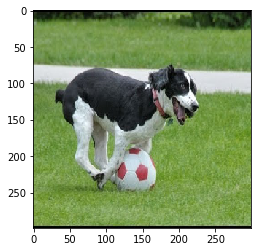

In [7]:
images = preprocess_img(['img.jpg'])
plt.imshow(images[0] / 2 + 0.5)
preds = model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [0]:
explainer = lime_image.LimeImageExplainer()

In [9]:
%%time
explanation = explainer.explain_instance(images[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 11.4 s, sys: 1.27 s, total: 12.7 s
Wall time: 12.6 s


In [0]:
from skimage.segmentation import mark_boundaries

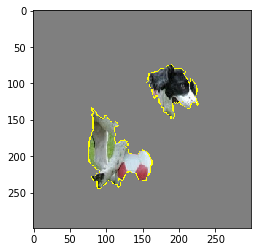

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

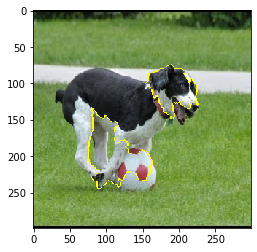

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

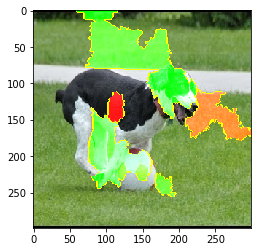

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

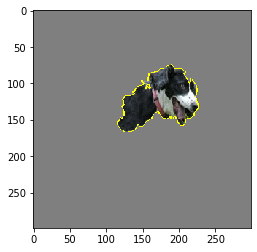

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

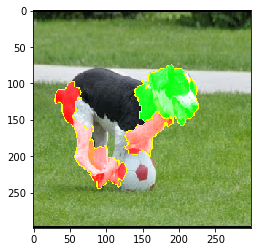

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))